<a href="https://colab.research.google.com/github/christinajoice/FocusEDU_casestudy/blob/main/Focus_Edumatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("FocusEDUData.csv")


In [74]:
df.head()

,session_id,session_type,session_date_time,district,school,student,grade,subject,participant_status,exit_ticket,session_rating,tutor_rating,tutor
0,1,scheduled,25-03-24 04:23,District 16,School 74,Student 14523,6,Math,Student Missed,NaN,NaN,NaN,Tutor 62
1,2,scheduled,07-02-24 7:03,District 18,School 77,Student 14988,7,Math,Student Missed,NaN,NaN,NaN,Tutor 46
2,3,scheduled,31-03-24 04:38,District 1,School 4,Student 709,11,Math,Completed,65.0,1.0,NaN,Tutor 13
3,4,scheduled,06-04-24 5:12,District 3,School 10,Student 2146,3,Science,Completed,34.0,5.0,5.0,Tutor 75
4,5,ondemand,26-02-24 10:36,District 13,School 55,Student 10904,6,Math,Completed,16.0,5.0,5.0,Tutor 24


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   session_id          500000 non-null  int64  
 1   session_type        500000 non-null  object 
 2   session_date_time   500000 non-null  object 
 3   district            500000 non-null  object 
 4   school              500000 non-null  object 
 5   student             500000 non-null  object 
 6   grade               500000 non-null  int64  
 7   subject             500000 non-null  object 
 8   participant_status  500000 non-null  object 
 9   exit_ticket         350169 non-null  float64
 10  session_rating      315124 non-null  float64
 11  tutor_rating        315107 non-null  float64
 12  tutor               500000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 49.6+ MB


In [76]:
df.isnull().sum()

session_id                 0
session_type               0
session_date_time          0
district                   0
school                     0
student                    0
grade                      0
subject                    0
participant_status         0
exit_ticket           149831
session_rating        184876
tutor_rating          184893
tutor                      0
dtype: int64

Columns such as

1.   exit_ticketing
2.   session_rating
3.   tutor_rating

has more null values compared to other columns.



---



In [77]:
df.describe()

,session_id,grade,exit_ticket,session_rating,tutor_rating
count,500000.000000,500000.000000,350169.000000,315124.000000,315107.000000
mean,250000.500000,7.501674,50.031445,2.500486,2.500792
std,144337.711635,2.872697,29.164679,1.706453,1.709988
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,125000.750000,5.000000,25.000000,1.000000,1.000000
50%,250000.500000,8.000000,50.000000,3.000000,3.000000
75%,375000.250000,10.000000,75.000000,4.000000,4.000000
max,500000.000000,12.000000,100.000000,5.000000,5.000000


From the above information:

1. The minimum grade a students get is 3.0 and max grade students received is 12.0
2. Among the overall students count 25% of the students got an average grade of 5.0, 50% of the average grades of 7.0 and 75% of the students got average grades of 10.
3. Session ratings and tutor ratings ranges from 0 to 5. Average rating on the overall sessions held so far is 2.49 and Average rating for the tutors is 2.50

In [78]:
# Fill 0 for exit_ticket column for null/empty cells
df['exit_ticket'].fillna(0, inplace=True)

In [79]:
# Fill average of session_rating for each district and school for null/empty cells
df['session_rating'] = df.groupby(['district', 'school'])['session_rating'].transform(lambda x: x.fillna(x.mean()))

In [80]:
# Fill average of tutor_rating for each district and school for null/empty cells
df['tutor_rating'] = df.groupby(['district', 'school'])['tutor_rating'].transform(lambda x: x.fillna(x.mean()))

In [81]:
df.isnull().sum()

session_id            0
session_type          0
session_date_time     0
district              0
school                0
student               0
grade                 0
subject               0
participant_status    0
exit_ticket           0
session_rating        0
tutor_rating          0
tutor                 0
dtype: int64

## To find the Total number of of Districts being tutored.

In [82]:
df['district'].unique()

array(['District 16', 'District 18', 'District 1', 'District 3',
       'District 13', 'District 15', 'District 14', 'District 11',
       'District 20', 'District 10', 'District 9', 'District 19',
       'District 12', 'District 2', 'District 17', 'District 5',
       'District 8', 'District 7', 'District 6', 'District 4'],
      dtype=object)

There are total 20 unique districts in the given dataset.

## To find the Total unique schools under each district

In [83]:
Tot_schools=df.groupby('district')['school'].nunique()
Tot_schools

district
District 1      4
District 10     2
District 11     7
District 12     3
District 13     4
District 14     2
District 15    10
District 16     5
District 17     2
District 18     1
District 19     8
District 2      5
District 20     2
District 3      4
District 4      4
District 5      1
District 6      5
District 7      7
District 8      5
District 9      6
Name: school, dtype: int64

<Axes: xlabel='district'>

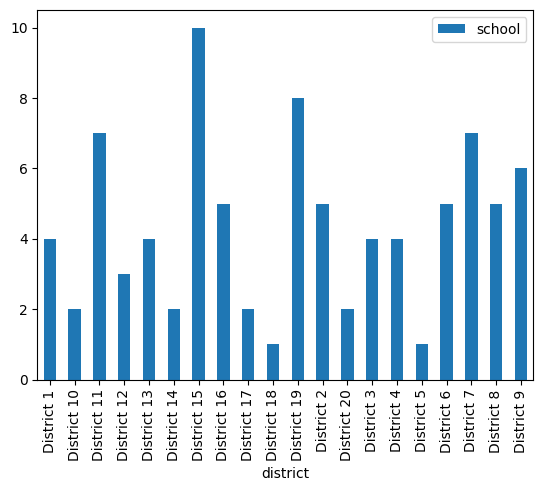

In [84]:
df.groupby('district')['school'].nunique().plot(kind='bar',legend=True)
# sns.barplot(x=df.groupby('district')['school'],y=df.groupby('district')['school'].nunique())
# plt.show()

In [85]:
# Sum of total schools overall in all the districts.
Tot_schools.sum()

87

* There are around 20 unique districts with each district has certain schools assiciated with it.
* District 15 has the maximum number of schools associated and the total schools on that district is 10.
* Total number of schools in all the districts are 87.

## Total students under each district

In [86]:
## Find total number of students in each district.
Tot_students=df.groupby('district')['student'].nunique()
Tot_students.sort_values(ascending=False)

district
District 15    2062
District 11    1465
District 7     1449
District 19    1363
District 9     1325
District 2     1111
District 8      973
District 1      890
District 6      879
District 16     834
District 4      780
District 13     738
District 3      623
District 12     545
District 20     491
District 10     390
District 17     363
District 14     339
District 5      205
District 18     105
Name: student, dtype: int64

<Axes: xlabel='district'>

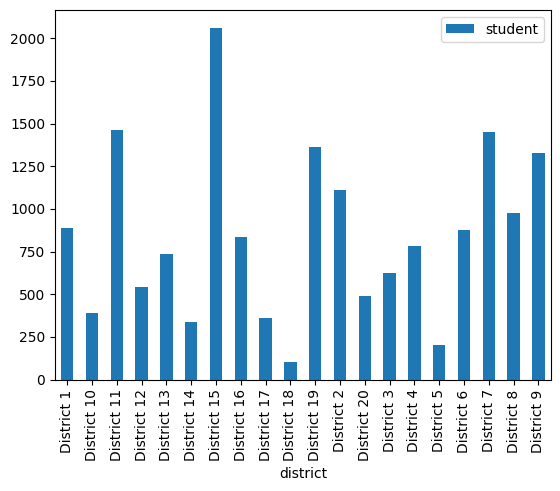

In [87]:
df.groupby('district')['student'].nunique().plot(kind='bar',legend=True)

In [88]:
Tot_students.sum()

16930

* District 15 has the maximum number of students learning and the total students on that district is 1878.
* Total number of students in all the districts are 15,465.

## Session status/subject summary rolled up to School and District hierarchy

In [110]:
# session_status=df.pivot(index=['district','school'],columns='participant_status')
pivot_df = df.pivot_table(index=['district','school'],columns='participant_status', aggfunc='size', fill_value=0)

# Add total values under each column
pivot_df['Total'] = pivot_df.sum(axis=1)

# Resetting the index to make the DataFrame easier to read
pivot_df = pivot_df.reset_index()

# Display the pivoted DataFrame
pivot_df.head(20)

participant_status,district,school,Cancelled,Completed,Partially Completed,Student Missed,Tutor Missed,Total
0,District 1,School 1,435,5890,247,1659,178,8409
1,District 1,School 2,197,2912,120,818,84,4131
2,District 1,School 3,343,4801,200,1400,137,6881
3,District 1,School 4,336,4766,191,1404,144,6841
4,District 10,School 42,409,5352,213,1552,149,7675
5,District 10,School 43,200,2656,118,696,57,3727
6,District 11,School 44,357,5127,238,1488,143,7353
7,District 11,School 45,373,5134,231,1573,142,7453
8,District 11,School 46,252,3437,157,1006,97,4949
9,District 11,School 47,308,4550,170,1318,137,6483


In [90]:
Tot_students=df.groupby(['district','school'])['student'].count()
Tot_students.head(20)

district     school   
District 1   School 1     8409
             School 2     4131
             School 3     6881
             School 4     6841
District 10  School 42    7675
             School 43    3727
District 11  School 44    7353
             School 45    7453
             School 46    4949
             School 47    6483
             School 48    8550
             School 49    3956
             School 50    4713
District 12  School 51    3172
             School 52    8710
             School 53    4168
District 13  School 54    7278
             School 55    5387
             School 56    5908
             School 57    3156
Name: student, dtype: int64

As per the above data, the total number of students under each school and district has been categorised based on their participant statuses and the grand total of all the participant statuses while compared with the total number of students in each school is equal. So this data is validated.

## School with the Highest average exit ticket score in Math and English separately

In [91]:
pivot_df_exit = df.pivot_table(index='school',columns='subject',values='exit_ticket',aggfunc='mean', fill_value=0)

# Display the pivoted DataFrame
pivot_df_exit.drop(columns=['Science','Social Studies'],inplace=True)
pivot_df_exit['Grand_Total'] = pivot_df_exit.mean(axis=1)

# Resetting the index to make the DataFrame easier to read
pivot_df_exit = pivot_df_exit.reset_index()
pivot_df_exit

subject,school,English,Math,Grand_Total
0,School 1,34.621015,35.038671,34.829843
1,School 10,35.512858,34.768323,35.140591
2,School 11,34.621652,35.393156,35.007404
3,School 12,34.706503,35.851875,35.279189
4,School 13,35.998453,35.247375,35.622914
...,...,...,...,...
82,School 84,35.865031,34.180809,35.022920
83,School 85,34.672115,35.640202,35.156159
84,School 86,35.626916,35.394393,35.510654
85,School 87,34.559678,35.175573,34.867625


In [92]:
# Finding Highest exit score in math
highest_avg_math = pivot_df_exit['Math'].max()
highest_avg_math_school = pivot_df_exit[pivot_df_exit['Math'] == highest_avg_math]
highest_avg_math_school

subject,school,English,Math,Grand_Total
75,School 78,35.813778,36.489811,36.151795


In [93]:
highest_avg_eng = pivot_df_exit['English'].max()
highest_avg_eng_school = pivot_df_exit[pivot_df_exit['English'] == highest_avg_eng]
highest_avg_eng_school

subject,school,English,Math,Grand_Total
62,School 66,37.16624,35.917896,36.542068


## Average exit ticket scores rolled up to the district.

In [94]:
Avg_exit_ticket_dist= df.groupby('district')['exit_ticket'].mean()
Avg_exit_ticket_dist

district
District 1     35.028596
District 10    35.079547
District 11    35.099086
District 12    35.000872
District 13    35.050716
District 14    35.335813
District 15    35.132614
District 16    34.627617
District 17    35.416629
District 18    34.607302
District 19    35.215650
District 2     35.145477
District 20    35.489896
District 3     35.070141
District 4     34.842308
District 5     34.756267
District 6     34.967035
District 7     35.157623
District 8     34.962214
District 9     34.624158
Name: exit_ticket, dtype: float64

## District with Highest/Lowest Tutor/Session rating

In [98]:
# To find average of session_rating and tutor_rating in each district
Avg_rating_dist= df.groupby('district')[['session_rating','tutor_rating']].mean()
Avg_rating_dist

,session_rating,tutor_rating
district,,
District 1,2.495108,2.493780
District 10,2.504257,2.499094
District 11,2.496387,2.481831
District 12,2.480126,2.522116
District 13,2.492662,2.508590
District 14,2.516560,2.544194
District 15,2.503907,2.476794
District 16,2.471565,2.534131
District 17,2.520142,2.487840


In [106]:
Highest_tutor_rating = Avg_rating_dist['tutor_rating'].max()
Highest_tutor_rating_dist = Avg_rating_dist[Avg_rating_dist['tutor_rating'] == Highest_tutor_rating]
Highest_tutor_rating_dist['tutor_rating']

district
District 14    2.544194
Name: tutor_rating, dtype: float64

In [107]:
Lowest_tutor_rating = Avg_rating_dist['tutor_rating'].min()
Lowest_tutor_rating_dist = Avg_rating_dist[Avg_rating_dist['tutor_rating'] == Lowest_tutor_rating]
Lowest_tutor_rating_dist['tutor_rating']

district
District 18    2.471414
Name: tutor_rating, dtype: float64

In [108]:
Highes_session_rating = Avg_rating_dist['session_rating'].max()
Highes_session_rating_dist = Avg_rating_dist[Avg_rating_dist['session_rating'] == Highes_session_rating]
Highes_session_rating_dist['session_rating']

district
District 18    2.556418
Name: session_rating, dtype: float64

In [109]:
Lowest_session_rating = Avg_rating_dist['session_rating'].min()
Lowest_session_rating_dist = Avg_rating_dist[Avg_rating_dist['session_rating'] == Lowest_session_rating]
Lowest_session_rating_dist['session_rating']

district
District 16    2.471565
Name: session_rating, dtype: float64

From the Above insights it is clear that
1. Tutoring for district 18 is not upto the satisfaction, so we might need to change the way of teaching style in district 18.
2. In district 16, we may need to include some more additional sessions as the Average session rating is low compared to other districts.

## Business Insights and Recommendations:

* There are around 20 unique districts with each district has certain schools assiciated with it.
* District 15 has the maximum number of schools associated and the total schools on that district is 10.
* Total number of schools in all the districts are 87.
* Tutoring for district 18 is not upto the satisfaction, so we might need to change the way of teaching style in district 18.
* In district 16, we may need to include some more additional sessions as the Average session rating is low compared to other districts.